In [11]:
import numpy as np
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt 
%matplotlib inline

In [12]:
hsr_location_data = pd.read_excel('datasets/HSR_Locations.xlsx')
hsr_location_data.head()

,Station,Lateral Coordinates (yloc),Longitudinal Coordinates (xloc),Station Spacing (km),Lines,Junction,Additional Information
0,Seoul,37.554722,126.970833,0.0,"Gyeongbu, Honam",NaN,NaN
1,Yongsan,37.529788,126.964660,3.2,Honam,NaN,All Gyeongbu PASS
2,Gwangmyeong,37.416051,126.884686,22.0,"Gyeongbu, Honam",NaN,NaN
3,Cheonan-Asan,36.785750,127.102833,74.0,"Gyeongbu, Honam",NaN,NaN
4,Osong,36.627072,127.327287,28.7,"Gyeongbu, Honam","Gyeongbu, Honam",NaN


In [13]:
def visualize_lines(data):
    temp_lines = []
    for index, row in data.iterrows(): 
        temp_val = row['Lines'].split(', ')
        temp_lines += temp_val
    
    unique_lines = sorted(set(temp_lines))
    plt.figure(figsize=(12,10))
    plt.xlabel('Longitudinal Coordinates')
    plt.ylabel('Lateral Coordinates')

    colors = ['blue','red']

    for index,row in data.iterrows(): 
        string_mask = row['Lines']
        mask = row['Lines'].split(", ")  
        if len(mask) > 1:
            plot_data = data[(data['Lines'] == string_mask)]
            plt.plot(plot_data['Longitudinal Coordinates (xloc)'].values,plot_data['Lateral Coordinates (yloc)'].values,color='blue')
        
        if row['Junction'] == string_mask: 
            for color, temp_line in zip(colors, mask):
                tempx_list = [row['Longitudinal Coordinates (xloc)']]
                tempy_list = [row['Lateral Coordinates (yloc)']]
                 
                next_row_x = data[(data['Lines'] == temp_line) & (data['Station'] != 'Yongsan')]['Longitudinal Coordinates (xloc)'].values[0]
                next_row_y = data[(data['Lines'] == temp_line) & (data['Station'] != 'Yongsan')]['Lateral Coordinates (yloc)'].values[0]
                
                tempx_list.append(next_row_x)
                tempy_list.append(next_row_y)
                plt.plot(tempx_list, tempy_list, color=color)
        else:
            for color, line in zip(colors,unique_lines): 
                plot_data = data[(data['Lines'] == line) & (data['Station'] != 'Yongsan')]
                plt.plot(plot_data['Longitudinal Coordinates (xloc)'].values,plot_data['Lateral Coordinates (yloc)'].values,color=color)
        
    plt.savefig('figures/KTX_main_lines.png')

   

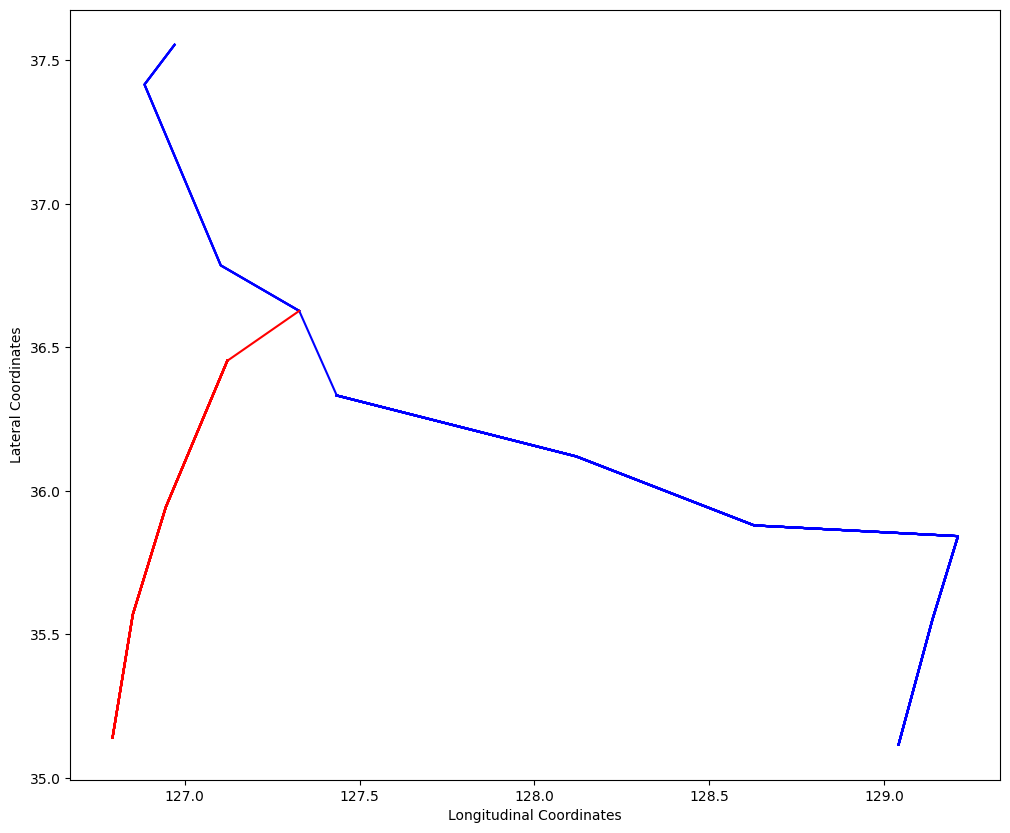

In [14]:
visualize_lines(hsr_location_data)

In [15]:
gyeongbu_data = pd.read_excel('datasets/Gyeongbu_HSR.xlsx')
gyeongbu_data.head()

,Train,Number,Departure Time,Arrival Time,Travel Time (Hours),Stops,Cost (Korean Won),Cost (US Dollars),Additional Information
0,KTX,1,05:13:00,07:49:00,02:36:00,"Gwangmyeong, Daejeon, Dongdaegu, Gyeongju, Uls...",59800,44.252,HSR ONLY
1,KTX,3,05:28:00,08:15:00,02:47:00,"Gwangmyeong, Cheonan-Asan, Daejeon, Gimcheon-G...",59800,44.252,HSR ONLY
2,KTX,5,05:58:00,08:42:00,02:44:00,"Gwangmyeong, Cheonan-Asan, Daejeon, Seodaegu, ...",59400,43.956,Seodaegu
3,KTX-Sancheon,75,06:03:00,08:48:00,02:45:00,"Gwangmyeong, Cheonan-Asan, Osong, Daejeon, Gim...",59800,44.252,HSR ONLY
4,KTX,7,06:33:00,09:21:00,02:48:00,"Gwangmyeong, Osong, Daejeon, Gimcheon-Gumi, Do...",59800,44.252,HSR ONLY


In [16]:
honam_data = pd.read_excel('datasets/Honam_HSR.xlsx')
honam_data.head()

,Train,Number,Departure Time,Arrival Time,Travel Time (Hours),Stops,Cost (Korean Won),Cost (US Dollars),Additional Information,Virtual Departure Time
0,KTX-Sancheon,401,05:08:00,07:06:00,01:58:00,"Gwangmyeong, Osong, Gongju, Iksan, Jeongeup",42100,31.154,HSR ONLY,NaN
1,KTX-Sancheon,403,05:48:00,07:45:00,01:57:00,"Gwangmyeong, Cheonan-Asan, Osong, Iksan, Jeongeup",42100,31.154,HSR ONLY,NaN
2,KTX,405,06:29:00,08:27:00,01:58:00,"Gwangmyeong, Osong, Gongju, Iksan, Jeongeup",46800,34.632,"HSR ONLY, From Seoul",NaN
3,KTX,441,07:38:00,09:24:00,01:46:00,"Gwangmyeong, Osong, Iksan",46800,34.632,HSR ONLY,NaN
4,KTX-Sancheon,407,07:47:00,09:41:00,01:54:00,"Gwangmyeong, Gongju, Iksan, Jeongeup",46800,34.632,"HSR ONLY, From Seoul",NaN


In [17]:
hsr_data = pd.read_excel('datasets/HSR_Locations.xlsx')
hsr_data.head()

,Station,Lateral Coordinates (yloc),Longitudinal Coordinates (xloc),Station Spacing (km),Lines,Junction,Additional Information
0,Seoul,37.554722,126.970833,0.0,"Gyeongbu, Honam",NaN,NaN
1,Yongsan,37.529788,126.964660,3.2,Honam,NaN,All Gyeongbu PASS
2,Gwangmyeong,37.416051,126.884686,22.0,"Gyeongbu, Honam",NaN,NaN
3,Cheonan-Asan,36.785750,127.102833,74.0,"Gyeongbu, Honam",NaN,NaN
4,Osong,36.627072,127.327287,28.7,"Gyeongbu, Honam","Gyeongbu, Honam",NaN


In [18]:
def convert_to_hours(time_obj):
    # Extract hours and minutes
    hours = time_obj.hour
    minutes = time_obj.minute
    # Convert to total hours
    total_hours = hours + minutes / 60.0
    return round(total_hours,2)

In [19]:
# Apply the conversion function to the 'Travel Time' column and create a new column for hours
gyeongbu_data['Travel Time (Hours)'] = gyeongbu_data['Travel Time (Hours)'].apply(convert_to_hours)
honam_data['Travel Time (Hours)'] = honam_data['Travel Time (Hours)'].apply(convert_to_hours)

In [20]:
gyeongbu_data['ID'] = range(1, len(gyeongbu_data) + 1)
gyeongbu_data.head()

,Train,Number,Departure Time,Arrival Time,Travel Time (Hours),Stops,Cost (Korean Won),Cost (US Dollars),Additional Information,ID
0,KTX,1,05:13:00,07:49:00,2.60,"Gwangmyeong, Daejeon, Dongdaegu, Gyeongju, Uls...",59800,44.252,HSR ONLY,1
1,KTX,3,05:28:00,08:15:00,2.78,"Gwangmyeong, Cheonan-Asan, Daejeon, Gimcheon-G...",59800,44.252,HSR ONLY,2
2,KTX,5,05:58:00,08:42:00,2.73,"Gwangmyeong, Cheonan-Asan, Daejeon, Seodaegu, ...",59400,43.956,Seodaegu,3
3,KTX-Sancheon,75,06:03:00,08:48:00,2.75,"Gwangmyeong, Cheonan-Asan, Osong, Daejeon, Gim...",59800,44.252,HSR ONLY,4
4,KTX,7,06:33:00,09:21:00,2.80,"Gwangmyeong, Osong, Daejeon, Gimcheon-Gumi, Do...",59800,44.252,HSR ONLY,5


In [21]:
honam_data['ID'] = range(1, len(honam_data) + 1)
honam_data.head()

,Train,Number,Departure Time,Arrival Time,Travel Time (Hours),Stops,Cost (Korean Won),Cost (US Dollars),Additional Information,Virtual Departure Time,ID
0,KTX-Sancheon,401,05:08:00,07:06:00,1.97,"Gwangmyeong, Osong, Gongju, Iksan, Jeongeup",42100,31.154,HSR ONLY,NaN,1
1,KTX-Sancheon,403,05:48:00,07:45:00,1.95,"Gwangmyeong, Cheonan-Asan, Osong, Iksan, Jeongeup",42100,31.154,HSR ONLY,NaN,2
2,KTX,405,06:29:00,08:27:00,1.97,"Gwangmyeong, Osong, Gongju, Iksan, Jeongeup",46800,34.632,"HSR ONLY, From Seoul",NaN,3
3,KTX,441,07:38:00,09:24:00,1.77,"Gwangmyeong, Osong, Iksan",46800,34.632,HSR ONLY,NaN,4
4,KTX-Sancheon,407,07:47:00,09:41:00,1.90,"Gwangmyeong, Gongju, Iksan, Jeongeup",46800,34.632,"HSR ONLY, From Seoul",NaN,5


In [22]:
def average_stops_calculator(data,line):
    stop_numbers = 0
    for i in range(len(data['Stops'])):
        my_string = data['Stops'][i]
        my_list = my_string.split(",") 
        stop_numbers += len(my_list)

    train_num = len(data['Stops'])
    print(line+f' Train Number: {train_num} trains')
    average_stops = np.round(stop_numbers / train_num)
    print(line+ f'Average number of stops: {average_stops} stops')

In [23]:
average_stops_calculator(gyeongbu_data,'Gyeongbu')
average_stops_calculator(honam_data,'Honam')

Gyeongbu Train Number: 58 trains
GyeongbuAverage number of stops: 6.0 stops
Honam Train Number: 24 trains
HonamAverage number of stops: 4.0 stops


$ q = \frac{1}{\overline{h}} $

- q is traffic flow measured in vehicles per hour
- $\overline{h}$ is the average headway in hours

In [13]:
# Convert 'Departure Time' and 'Arrival Time' to datetime objects
gyeongbu_data['Departure Time'] = pd.to_datetime(gyeongbu_data['Departure Time'], format='%H:%M:%S')
gyeongbu_data['Arrival Time'] = pd.to_datetime(gyeongbu_data['Arrival Time'], format='%H:%M:%S')

# Calculate the time differences between stops
time_diff = 0
for i in range(len(gyeongbu_data['Departure Time'])-50):
    dep_time = gyeongbu_data['Departure Time'].iloc[i]
    next_dep_time = gyeongbu_data['Departure Time'].iloc[i+1]
    print(f'next: {next_dep_time} current: {dep_time}')
    diff = (next_dep_time - dep_time).total_seconds() / 3600  # Convert seconds to hours
    print(f'diff: {diff*60}')
    time_diff += diff

print(f"Total time difference: {time_diff} hours")

next: 1900-01-01 05:28:00 current: 1900-01-01 05:13:00
diff: 15.0
next: 1900-01-01 05:58:00 current: 1900-01-01 05:28:00
diff: 30.0
next: 1900-01-01 06:03:00 current: 1900-01-01 05:58:00
diff: 5.0
next: 1900-01-01 06:33:00 current: 1900-01-01 06:03:00
diff: 30.0
next: 1900-01-01 06:57:00 current: 1900-01-01 06:33:00
diff: 24.0
next: 1900-01-01 07:28:00 current: 1900-01-01 06:57:00
diff: 31.000000000000004
next: 1900-01-01 07:50:00 current: 1900-01-01 07:28:00
diff: 22.0
next: 1900-01-01 07:58:00 current: 1900-01-01 07:50:00
diff: 8.0
Total time difference: 2.75 hours


In [14]:
average_headway_hours = time_diff / train_num
print(f'Average headway: {np.round(average_headway_hours,3)} hours')
print(f'Average headway: {np.round(average_headway_hours*60,3)} minutes')

NameError: name 'train_num' is not defined

In [ ]:
q_flow = 1/average_headway_hours
print(f'Average Traffic Flow: {q_flow} trains per hour')

Average Traffic Flow: 21.090909090909093 trains per hour


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the stops for the first train
stops = data.loc[0, 'Stops'].split(', ')
stop_distances = [0, 15, 100, 200, 300, 398.2]  # Example distances in km for each stop
total_distance = 398.2
cruise_speed = 300  # km/h
stop_time = 2 / 60  # hours per stop

# Create time and distance lists
time_points = [0]  # Start at time 0
distance_points = [0]  # Start at Seoul (0 km)

current_time = 0

for i in range(1, len(stop_distances)):
    # Calculate travel time to next stop
    travel_time = (stop_distances[i] - stop_distances[i - 1]) / cruise_speed
    current_time += travel_time
    time_points.append(current_time)
    distance_points.append(stop_distances[i])
    
    # Add stop time
    current_time += stop_time
    time_points.append(current_time)
    distance_points.append(stop_distances[i])

# Generate the plot
plt.figure(figsize=(10, 6))
plt.plot(time_points, distance_points, marker='o')
plt.xlabel('Time (hours)')
plt.ylabel('Distance from Seoul (km)')
plt.title('Train Trajectory from Seoul to Busan')
plt.grid(True)
plt.show()


NameError: name 'data' is not defined